<a href="https://colab.research.google.com/github/PeteCrowley/MachineLearning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


IMG_ROWS, IMG_COLS = 32, 32
NUM_CLASSES = 10

# Helper Functions for Visualization
def show_min_max(array, i):
  random_image =array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(label_names[labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.show()


label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']

# Loading in 2 copies of the dataset
((train_images, train_labels), (test_images, test_labels)) = cifar10.load_data()
((train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup)) = cifar10.load_data()

train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

# Preparing the images for the neural network
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_labels = keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NUM_CLASSES)



170508288/170498071 [==============================] - 11s 0us/step


In [2]:
# A Convolutional Neural Network, takes about 45 mins to train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

EPOCHS = 15
BATCH_SIZE = 64

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True)

scores = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', scores[1])
model.save('cnn_cifar10.h5')

Epoch 1/15
782/782 [==============================] - 202s 257ms/step - loss: 1.5392 - accuracy: 0.4338
Epoch 2/15
782/782 [==============================] - 201s 257ms/step - loss: 1.1708 - accuracy: 0.5846
Epoch 3/15
782/782 [==============================] - 202s 258ms/step - loss: 1.0155 - accuracy: 0.6419
Epoch 4/15
782/782 [==============================] - 200s 256ms/step - loss: 0.9220 - accuracy: 0.6775
Epoch 5/15
782/782 [==============================] - 200s 255ms/step - loss: 0.8638 - accuracy: 0.7005
Epoch 6/15
782/782 [==============================] - 199s 254ms/step - loss: 0.8103 - accuracy: 0.7195
Epoch 7/15
782/782 [==============================] - 199s 255ms/step - loss: 0.7692 - accuracy: 0.7331
Epoch 8/15
782/782 [==============================] - 200s 256ms/step - loss: 0.7399 - accuracy: 0.7424
Epoch 9/15
782/782 [==============================] - 200s 256ms/step - loss: 0.7108 - accuracy: 0.7548
Epoch 10/15
782/782 [==============================] - 202s 258m

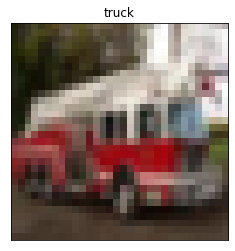

Prediction: truck


In [14]:
from keras.models import load_model
model = load_model("cnn_cifar10.h5")

choice = np.random.randint(0, len(test_images))
plot_image(test_images, choice, test_labels_backup)

prediction = model.predict(np.array([test_images[choice]]))
max_value = max(prediction[0])
max_index = np.where(prediction[0] == max_value)


print(f'Prediction: {label_names[max_index[0][0]]}')